In [2]:
import pandas as pd
import numpy as np
from scipy import sparse
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import rainbow
import os
import glob

## Import the jsonified transactions into a dataframe

In [160]:
path = '/Users/Sarah/galvanize/dsi-capstone/jsons/'
all_files = glob.glob(os.path.join(path, "*.json"))

In [161]:
df = pd.concat((pd.read_json(f,keep_default_dates=False,lines=True) for f in all_files)) 

## Import just one day into a dataframe 

In [5]:
df=pd.read_json('./jsons/1.json',keep_default_dates=False,lines=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 10 columns):
date      2535 non-null object
gross+    2535 non-null float64
gross-    2535 non-null float64
items     2535 non-null object
net       2535 non-null float64
oper      2535 non-null int64
term      2535 non-null int64
time      2535 non-null object
trans     2535 non-null int64
type      2535 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 198.1+ KB


In [70]:
df['items_length']=df['items'].sum(axis=0)
df['items_length']

ValueError: Length of values does not match length of index

In [64]:
def get_depts(df,most_common=10,least_common=5):

    stoppers = ['BAG CREDIT','SF Bag Charge','Gift Card Reload','8 OZ BIO TUB t3', '16OZ BIO TUB t4',
                 '32OZ BIO TUB t5','BOTTLE DEPOSIT','6PACK BEER SMALL C']

    
    '''build a dictionary where the keys are the words
    in the dataframe items column'''
    
    depts=[]
    dept_dict = defaultdict(int)
    
    for basket in df['items']:
        for item in basket:
            depts.append(item[3])
            dept_dict[item[3]] += 1
    
    depts_set=set(depts)
    
    return depts_set
    
    '''add the most common words to the stopwords list'''
    stopwords=list([i[0] for i in Counter(item_dict).most_common(most_common)])
    
    for s in stoppers:
        stopwords.append(s)
        
    '''add items containing "CRV" to the stopwords list'''
    for item in items_set:
        if "crv" in item.lower():
            stopwords.append(item)
    
    '''add the least common words to the stopwords list'''
    for key,value in item_dict.items():
        if value < least_common:
            stopwords.append(key)
    print(type(stopwords) )  
    stopwords = set(stopwords)
    
    '''iterate through the baskets and add items to items_set
    if not in stopwords (too common or too uncommon)'''
    for stops in stopwords:
        items_set.remove(stops)
  

    return items_set,stopwords, item_dict

depts_set = get_depts(df,most_common=5,least_common=5)
dept_matrix = np.zeros((df.shape[0],len(depts_set)))
df_depts= pd.DataFrame(dept_matrix,columns=depts_set)

In [14]:
Counter(depts_set).most_common(55)

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (23, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (35, 1),
 (36, 1)]

In [15]:
len(depts_dict)

NameError: name 'depts_dict' is not defined

In [17]:
len(depts_set)

27

In [166]:
len(stopwords)

8165

In [167]:
len(stopwords)/len(items_set)

0.6140944645006017

In [168]:
df.shape[0]

73865

In [19]:
dept_matrix.shape

(2535, 27)

In [172]:
df_items.shape

(73865, 13296)

In [21]:
item_set.shape

NameError: name 'item_set' is not defined

In [24]:
df.index

RangeIndex(start=0, stop=2535, step=1)

In [25]:
df=df.reset_index()

In [26]:
df.index

RangeIndex(start=0, stop=2535, step=1)

In [27]:
df.describe()

,index,gross+,gross-,net,oper,term,trans
count,2535.00000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,1267.00000,127.272513,9.008824,118.263688,129.063511,4.627219,156.600789
std,731.93579,554.316366,196.084414,473.650506,353.456813,2.992276,131.049121
min,0.00000,0.000000,0.000000,-313.130000,3.000000,1.000000,1.000000
25%,633.50000,12.805000,0.000000,12.330000,22.000000,2.000000,58.000000
50%,1267.00000,39.670000,0.000000,39.130000,60.000000,5.000000,120.000000
75%,1900.50000,88.250000,0.000000,85.775000,79.000000,6.500000,222.000000
max,2534.00000,12572.710000,6716.650000,8127.080000,1745.000000,11.000000,583.000000


In [28]:
df.pop('index')
print ()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 10 columns):
date      2535 non-null object
gross+    2535 non-null float64
gross-    2535 non-null float64
items     2535 non-null object
net       2535 non-null float64
oper      2535 non-null int64
term      2535 non-null int64
time      2535 non-null object
trans     2535 non-null int64
type      2535 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 198.1+ KB


In [30]:
df.iloc[:,0].index


RangeIndex(start=0, stop=2535, step=1)

In [32]:
df_depts.iloc[:,0].index

RangeIndex(start=0, stop=2535, step=1)

In [182]:
#df_items.index = list(df_items.index)

In [183]:
#df=df.drop(columns='Gift Card Reload',axis=1)

In [184]:
'''for items in items_set:
    df[items] = 0'''

'for items in items_set:\n    df[items] = 0'

In [185]:
df['items'].head()

0    [[, MINTS PEPPERMINT, 2.69, 15], [, KONA DEEP ...
1    [[, BLUEBERRIES, 5.99, 12], [, ALXNDRE YOGURT,...
2    [[, CRV SMALL NO TAX, 0.05, 15], [MP, Worker 2...
3    [[, CRV LRG SING NOTAX, 0.1, 15], [MP, Worker ...
4    [[, GF 7 GRAIN BREAD, 5.89, 17], [, SMALL COOL...
Name: items, dtype: object

In [33]:
col_index_dict = dict(zip(depts_set, range(len(depts_set))))

In [187]:
'''#example of putting one item into the matrix
i = 0
for item in df['items'][i]:
    print( item )
    print( i, col_index_dict[ item[1] ], item[2] )
    print(df.iloc[i, col_index_dict[ item[1] ]])
    print()
df['items'][0][0][2]
type(df.iloc[0,6000])
type(df.iloc[0,6000])+df['items'][0][0][2]
for item in df['items'][0]:
    print(type(item[2]))
    print(item)
'''

"#example of putting one item into the matrix\ni = 0\nfor item in df['items'][i]:\n    print( item )\n    print( i, col_index_dict[ item[1] ], item[2] )\n    print(df.iloc[i, col_index_dict[ item[1] ]])\n    print()\ndf['items'][0][0][2]\ntype(df.iloc[0,6000])\ntype(df.iloc[0,6000])+df['items'][0][0][2]\nfor item in df['items'][0]:\n    print(type(item[2]))\n    print(item)\n"

In [34]:
matrix = np.zeros(df_depts.shape)
matrix.shape

(2535, 27)

In [189]:
matrix[0,6000]

0.0

In [37]:
    for i in range(df.shape[0]):
        for item in df['items'][i]:
            #set matrix to boolean for item precence in basket:
            if item[3]:
                matrix[i,col_index_dict[ item[3] ]] = matrix[i,col_index_dict[ item[3] ]] + 1
            '''if item[1] not in stopwords and item[2] > 0:
                matrix[i,col_index_dict[ item[1] ]] = 1
            if item[1] not in stopwords and item[2] < 0:
                matrix[i,col_index_dict[ item[1] ]] = 0'''
    #matrix = (matrix > 0).astype(int)
 

In [39]:
#count rows of baskets with a total of 0 weight items
sum=0
for i in range(matrix.shape[0]):
    if matrix[i].sum()<0:
        sum+=1
print (sum)

0


In [40]:
matrix = (matrix > 0).astype(int)

In [41]:
matrix.shape

(2535, 27)

Set all negative values in the matrix to 0.

In [42]:
#not necessary anymore
#matrix[matrix<0]=0

In [43]:
sum/matrix.shape[0]

0.0

In [44]:
sparse_matrix = sparse.csr_matrix(matrix)

In [45]:
sparse_matrix

<2535x27 sparse matrix of type '<class 'numpy.int64'>'
	with 10417 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics

In [48]:
from sklearn.decomposition import NMF
model = NMF(n_components=10,max_iter=500)
W = model.fit_transform(sparse_matrix)
H=model.components_
model.get_params()
model.n_iter_

114

In [55]:
from sklearn import SVD
SVD_model = NMF(n_components=10,max_iter=500)
SVD_W = model.fit_transform(sparse_matrix)
SVD_H=model.components_
model.get_params()

ImportError: cannot import name 'SVD'

In [199]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
LDA_model = LDA(n_components=10,max_iter=10)
LDA_W = model.fit_transform(sparse_matrix)
LDA_H = model.components_


AttributeError: 'LatentDirichletAllocation' object has no attribute 'n_iter_'

In [200]:
LDA_model.get_params()

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': None,
 'n_topics': None,
 'perp_tol': 0.1,
 'random_state': None,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [186]:
list(items_set)[1000]

'NAT SMOKED CHEESE'

In [52]:
feature_names=list(depts_set).copy()
n_top_words=5
for topic in H:
    print(topic.argsort()[:-n_top_words - 1:-1])
    print ([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]])
    print()

[21  1 16  6 10]
[23, 1, 16, 6, 10]

[13 18 20  7  8]
[13, 19, 21, 7, 8]

[15 18 25  8  6]
[15, 19, 35, 8, 6]

[16 26  6 25 20]
[16, 36, 6, 35, 21]

[4 7 6 1 8]
[4, 7, 6, 1, 8]

[17 18  7 10 26]
[17, 19, 7, 10, 36]

[12 10  7 18 20]
[12, 10, 7, 19, 21]

[14 10 18  7 20]
[14, 10, 19, 7, 21]

[19  1 18  7  2]
[20, 1, 19, 7, 2]

[11 22  7  6 26]
[11, 31, 7, 6, 36]



In [118]:
prediction = model.inverse_transform(model.transform(sparse_matrix))

In [ ]:
metrics.explained_variance_score(matrix, prediction)


In [188]:
H.max()

0.8408964152537143

In [189]:
H[:,1].argsort()[-10:][::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [190]:
model

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=500,
  n_components=10, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [191]:
len(list(items_set))

9226

Topic #0:
[23, 1, 16, 6, 10, 8, 2, 31, 35, 33, 32, 7, 36, 5, 4, 9, 3, 13, 11, 12, 14, 15, 17, 19, 20, 21, 0]


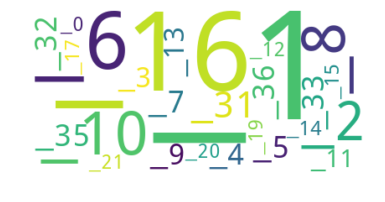

Topic #1:
[13, 19, 21, 7, 8, 10, 2, 33, 31, 6, 9, 32, 1, 3, 4, 5, 36, 11, 12, 35, 14, 15, 16, 17, 20, 23, 0]


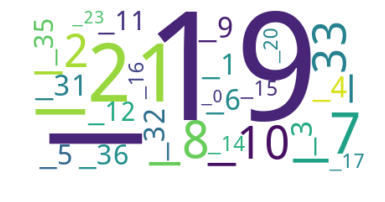

Topic #2:
[15, 19, 35, 8, 6, 2, 10, 21, 33, 3, 36, 1, 4, 5, 7, 9, 13, 11, 12, 14, 16, 17, 20, 23, 31, 32, 0]


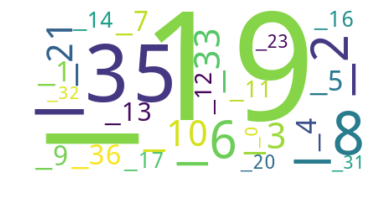

Topic #3:
[16, 36, 6, 35, 21, 5, 10, 11, 1, 2, 3, 4, 7, 8, 9, 13, 12, 14, 15, 17, 19, 20, 23, 31, 32, 33, 0]


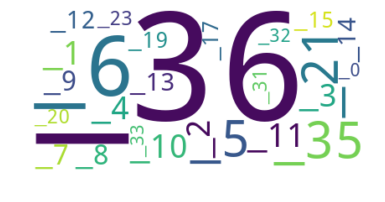

Topic #4:
[4, 7, 6, 1, 8, 31, 19, 35, 2, 21, 10, 3, 5, 32, 33, 9, 36, 13, 11, 12, 14, 15, 16, 17, 20, 23, 0]


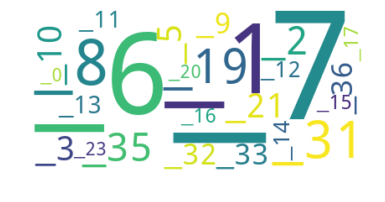

Topic #5:
[17, 19, 7, 10, 36, 6, 8, 11, 1, 2, 3, 4, 5, 9, 13, 12, 35, 14, 15, 16, 20, 21, 23, 31, 32, 33, 0]


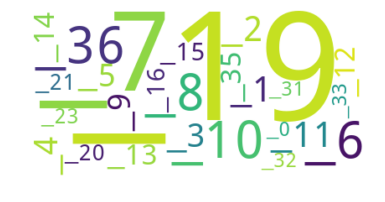

Topic #6:
[12, 10, 7, 19, 21, 32, 8, 36, 1, 2, 3, 4, 5, 6, 9, 13, 11, 35, 14, 15, 16, 17, 20, 23, 31, 33, 0]


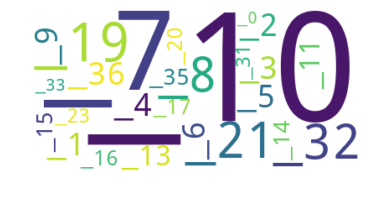

Topic #7:
[14, 10, 19, 7, 21, 8, 33, 35, 2, 31, 32, 1, 3, 4, 5, 6, 36, 13, 9, 11, 12, 15, 16, 17, 20, 23, 0]


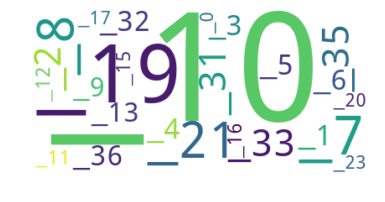

Topic #8:
[20, 1, 19, 7, 2, 3, 36, 33, 35, 32, 31, 10, 6, 5, 9, 4, 8, 13, 11, 12, 14, 15, 16, 17, 21, 23, 0]


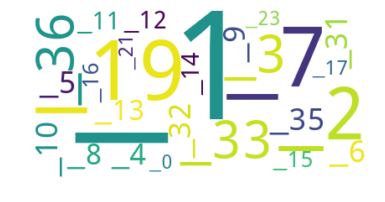

Topic #9:
[11, 31, 7, 6, 36, 2, 21, 5, 1, 3, 4, 8, 9, 10, 13, 12, 35, 14, 15, 16, 17, 19, 20, 23, 32, 33, 0]


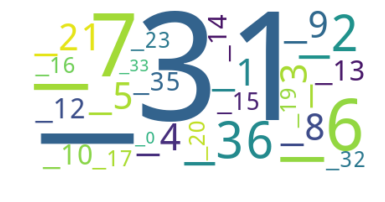

In [54]:
def print_top_items(model, feature_names, n_top_words):
    topics =[]
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        #topic_string=(" ".join([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]]))
        topic_string=str([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]])

        topics.append(topic_string)
        print(topic_string)
        #print()
        wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white").generate(topic_string.replace(" ", "_").replace("'",""))

        # Display the generated image:
        #plt.figure(1,figsize=(10,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #plt.savefig('topic%d.png'%topic_idx)
        #plt.close()
        wordcloud.to_file('topic%d.png'%topic_idx)
print_top_items(model,list(depts_set),55)

In [236]:
df['items'][1116]

[['', 'CLARAVALE COW MILK', 5.69, 13],
 ['DP', 'BOTTLE DEPOSIT', 2.0, 21],
 ['', 'BELLA CAPRA CHEVRE', 5.98, 14],
 ['', 'BAKERY', 2.99, 17],
 ['', 'BAKERY', 3.99, 17]]

In [55]:
def print_basket_contents(basket_id):
    basket=[]
    #print('+++++++++++++++++++++++next basket+++++++++++++++++')
    for items in df['items'][basket_id]:
        #for item in items:
        print("item:",items)
    #return basket
#print_basket_contents(1116)

In [56]:
def print_top_baskets(model, W, n_top_words):
    baskets = []
    for topic_idx, w in enumerate(W.T):
        basket_string=str([df['items'][i] for i in w.argsort()[:-n_top_words - 1:-1]])
        count = 0
        for i in w.argsort()[:-n_top_words - 1:-1]:
            count+=1
            print("++++++++++++++++++Topic #%d, basket #%d+++++++++++++++++++"%(topic_idx,count))
            print_basket_contents(i)
        #print_basket_contents([i for i in w.argsort()[:-n_top_words - 1:-1]])
        baskets.append(basket_string)
        #print(basket_string)
        #print()
        '''wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white").generate(basket_string.replace(" ", "_").replace("'",""))

        # Display the generated image:
        #plt.figure(1,figsize=(10,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #plt.savefig('topic%d.png'%topic_idx)
        #plt.close()
        wordcloud.to_file('topic%d.png'%topic_idx)'''
print_top_baskets(model,W,10)

++++++++++++++++++Topic #0, basket #1+++++++++++++++++++
item: ['', 'Protocolo Tinto Or', 7.99, 10]
item: ['', 'DUFFOUR GASGONE', 8.99, 10]
item: ['', '6075 FRESH RAVIOLI', 6.3, 16]
item: ['', 'BLACK TRUFFLE', 8.99, 16]
item: ['', 'BABA HUMMUS CLASSI', 4.79, 13]
item: ['', 'BEANS GREEN', 0.9500000000000001, 12]
item: ['', 'LEMONS MEYER', 1.08, 12]
item: ['', 'ONION BIALYS', 7.99, 17]
item: ['', 'UV GainFast Choc 2', 22.06, 1]
item: ['', 'GoLSprtProtChoc', 47.99, 2]
item: ['', 'BANANAS', 1.13, 12]
item: ['', 'DARK CHOCOLATE', 4.49, 15]
item: ['', 'CRV8PACK sml T', 0.4, 15]
item: ['MP', 'BAG CREDIT', -0.1, 23]
++++++++++++++++++Topic #0, basket #2+++++++++++++++++++
item: ['', 'HP Spilanthes Usne', 10.9, 1]
item: ['', 'HP Spilanthes Usne', 10.9, 1]
item: ['', 'SR Oil of Oregano', 8.78, 1]
item: ['', 'WHOLE SEED CAT', 9.95, 6]
item: ['MP', 'BAG CREDIT', -0.1, 23]
++++++++++++++++++Topic #0, basket #3+++++++++++++++++++
item: ['', '4110 ORG RLD OATS', 1.49, 16]
item: ['', 'WDMTH PNT JAR t6

++++++++++++++++++Topic #3, basket #1+++++++++++++++++++
item: ['', 'OXO DRESSINGSHAKER', 9.99, 6]
item: ['', 'POMELO SAVIGNON BL', 11.99, 10]
item: ['', '300c SQR CLMP t106', 5.99, 6]
item: ['', 'WW LOW CARB TORT', 4.29, 17]
item: ['', 'BANANAS', 2.81, 12]
item: ['', 'PAPAYA FORMOSA', 4.43, 12]
item: ['', 'DKB THIN GOOD SEED', 5.99, 17]
item: ['MR', 'SF Bag Charge', 0.1, 20]
item: ['MR', 'SF Bag Charge', 0.1, 20]
item: ['MR', 'SF Bag Charge', 0.1, 20]
item: ['MR', 'SF Bag Charge', 0.1, 20]
item: ['MR', 'SF Bag Charge', 0.1, 20]
item: ['MR', 'SF Bag Charge', 0.1, 20]
item: ['', 'HERITAGE FLAKE bag', 9.99, 15]
item: ['', 'CRISPS BARS EVERYT', 1.79, 15]
item: ['', '16OZ BIO TUB t4', 0.4, 36]
item: ['', '2325 CORNICHONS', 2.55, 16]
item: ['', 'MIX CHERRY TOMATO', 3.99, 12]
item: ['', 'BULK SCALE', 3.06, 16]
item: ['', 'BEETS GOLD LOOSE', 5.05, 12]
item: ['', 'TOMATO MIX HEIRLOO', 5.69, 12]
item: ['', 'SHISITO PEPPER', 3.99, 12]
item: ['', '2448 CASTEL OLIVE', 3.33, 16]
item: ['', '8 OZ BI

item: ['', '5104 ONION CASHEWS', 6.8100000000000005, 16]
item: ['', '7772 ALMOND BUTTR', 9.07, 16]
item: ['', '5452 ORG PNUT BUTR', 6.32, 16]
item: ['', '5101 ROAST CASHEWS', 7.4, 16]
item: ['', '3290 THOMPSON RAIS', 2.25, 16]
item: ['', 'LETTUCE ROMAINE', 2.99, 12]
item: ['', 'CELERY', 9.55, 12]
item: ['', 'BARR NECESSITIES', 2.99, 17]
item: ['', 'BARR NECESSITIES', 2.99, 17]
item: ['', 'BARR NECESSITIES', 2.99, 17]
item: ['', 'BARR NECESSITIES', 2.99, 17]
item: ['', 'BLACK CHINA CAKE', 24.5, 17]
item: ['', 'BANANAS', 2.96, 12]
item: ['', 'WILD 2 PACK', 2.59, 13]
item: ['', 'INDIAN BENTO', 8.15, 13]
item: ['', 'INDIAN BENTO', 8.15, 13]
item: ['', '3144 OG DR CRANBER', 12.49, 16]
item: ['', '2887 ENERGY CHUNKS', 6.68, 16]
item: ['', '3380 DRD MULBERRY', 5.7, 16]
item: ['', '3060 DATES', 4.85, 16]
item: ['', '5385 ALMOND BUTTER', 14.32, 16]
item: ['', '5290 WALNUTS', 6.59, 16]
item: ['', '5161 CASHEW PIECES', 5.78, 16]
item: ['', '5385 ALMOND BUTTER', 14.32, 16]
item: ['MP', 'BAG CREDIT

++++++++++++++++++Topic #8, basket #1+++++++++++++++++++
item: ['', 'PANNER TIKKA', 6.09, 19]
item: ['', 'AMY MARGHERITA PIZ', 5.89, 19]
item: ['MR', 'SF Bag Charge', 0.1, 20]
item: ['', 'GREEN NOODLETOMYUM', 1.79, 15]
item: ['', 'GREEN NOODLETOMYUM', 1.79, 15]
item: ['', 'SU Womens Ble', 42.21, 1]
item: ['', 'SATSUMA MANDARIN', 2.42, 12]
item: ['MP', '10% Vitamin TX', -10.59, 1]
++++++++++++++++++Topic #8, basket #2+++++++++++++++++++
item: ['', 'AMY VEG LASAGNA', 6.29, 19]
item: ['', 'PAC ALM UNSORIG 32', 2.99, 15]
item: ['', 'D O RAW IRISH MOSS', 10.19, 15]
item: ['', '4019 ORG TRAIL MIX', 7.31, 16]
item: ['MR', 'SF Bag Charge', 0.1, 20]
item: ['MR', 'SF Bag Charge', 0.1, 20]
item: ['', 'Now Ginger Root 90', 9.75, 1]
item: ['', '6535 RAW HEMPSEED', 7.52, 16]
++++++++++++++++++Topic #8, basket #3+++++++++++++++++++
item: ['', 'SYNERGY TRILOGY', 3.09, 13]
item: ['', 'SMALL COOLER CRV', 0.05, 13]
item: ['', 'SYNERGY TRILOGY', 3.09, 13]
item: ['', 'SMALL COOLER CRV', 0.05, 13]
item: [''

In [71]:
W[:,1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       3.90617938e-06, 2.20951407e-06, 0.00000000e+00])

In [74]:
n_top_words=10
for i,w in enumerate(W.T):
    print(i,w.argsort()[:-n_top_words - 1:-1])

0 [2484 2136  206 1022 2130 1465  456  168  272  144]
1 [ 116 1239 1090  326 1093 1938 1919 2311 1273 2116]
2 [1159 1189  383  722 1864 1368 1391 1136  537  314]
3 [2134 2142 2132 1946 1326 1491 2256  798 1593 1994]
4 [ 209  202 2481 2486 1566  289 2207 1272  307  793]
5 [2400  447 1231 1804 2372 1210  817  808  688 2081]
6 [ 911 1696 1927 1086 1285  131 1265 1322  700  672]
7 [2278 2094 2129 2133 2236 2242 2089 2454  161 2481]
8 [ 422 1025 1018  735  447 1589 2129 2133 1698  237]
9 [ 525  238  239 1284 2454  115 2396 2150 1942 1559]


In [76]:
len(list(items_set))

6576

In [75]:
for topic in H:
    print (topic.argsort()[:-10-1:-1])

[1752 6585 2198 2188 2189 2190 2191 2192 2193 2194]
[1271 6539 4820   80 4966 1929 2604 6546 2660 4806]
[6114 3455  640 2958  537   84 2189 4025 1017 4051]
[3058 2646 2476 5751 5768 6309 4302 4243 3450 6388]
[1484 4994 5017  125 4381  102 1207  435 1811 4079]


In [ ]:
feat
str([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]])

In [72]:
df.shape[0]
for i in range(10,11):
    row = df['items'][i:i+1]
    for item in row:
        for it in item:
            print (it[1],it[2])

4112 SINTO KIMCHI 13.54
PEPPERS RED BELL 2.75
CUCUMBERS 12.73
ORGANIC 2LB TOFU 20.95
5540 TAHINI 12.17
GINGER 4.79
GARLIC WHITE 3.01
PRODUCE SCALE 1.79
LIMES 2.0
CILANTRO 1.99
CILANTRO 1.99
BROCCOLI LOOSE 6.24
CELLO CAULIFLOWER 11.96
LEEKS 9.12
SUGAR PLUM CLAM 5.97
BEETS RED LOOSE 6.01
store 100% Bulks -34.5
store 100% Produce -70.35
store 100% Refrig -20.95


In [12]:
df.shape[0]
for i in range(10,11):
    row = df['items'][i:i+1]
    for item in row:
        for it in item:
            df[it[1]][i:i+1]=df[it[1]][i:i+1]+it[2]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df['CILANTRO'][10:11]

10    3.98
Name: CILANTRO, dtype: float64

In [19]:
df.shape[0]
for i in range(1,df.shape[0]):
    row = df['items'][i:i+1]
    for item in row:
        for it in item:
            df[it[1]][i:i+1]=df[it[1]][i:i+1]+it[2]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
df.shape

(2535, 6586)

In [22]:
df.to_pickle('02012019.pkl')

In [213]:
len(items_set)

6576

In [114]:
trans = []
for a in df[1:2]['items']:
    #trans.append([r for v in a for r in v])
    trans.append(a)
print(a)

[['', 'BLUEBERRIES', 5.99, 12], ['', 'ALXNDRE YOGURT', 4.99, 13], ['MP', 'Worker 20% Produce', -1.2, 12], ['MP', 'Worker 20% Refrig', -1.0, 13]]


In [96]:
trans =[]
for l in [i for i in df[1:2]['items']]:
    print (l)
    trans.append(l)
    print (trans)

[['', 'BLUEBERRIES', 5.99, 12], ['', 'ALXNDRE YOGURT', 4.99, 13], ['MP', 'Worker 20% Produce', -1.2, 12], ['MP', 'Worker 20% Refrig', -1.0, 13]]
[[['', 'BLUEBERRIES', 5.99, 12], ['', 'ALXNDRE YOGURT', 4.99, 13], ['MP', 'Worker 20% Produce', -1.2, 12], ['MP', 'Worker 20% Refrig', -1.0, 13]]]


In [4]:
#pd.get_dummies([i for i in df[1:2]['items']]).values()

In [80]:

type(df['items'].values)
count=0
for document in df['items'][1]:
    print (document)
    
    for word in(document):
        count+=1
        print (count,word)
        '''for letter in str(word):
            print (letter)'''

['', 'BLUEBERRIES', 5.99, 12]
1 
2 BLUEBERRIES
3 5.99
4 12
['', 'ALXNDRE YOGURT', 4.99, 13]
5 
6 ALXNDRE YOGURT
7 4.99
8 13
['MP', 'Worker 20% Produce', -1.2, 12]
9 MP
10 Worker 20% Produce
11 -1.2
12 12
['MP', 'Worker 20% Refrig', -1.0, 13]
13 MP
14 Worker 20% Refrig
15 -1.0
16 13


NameError: name 'plt' is not defined

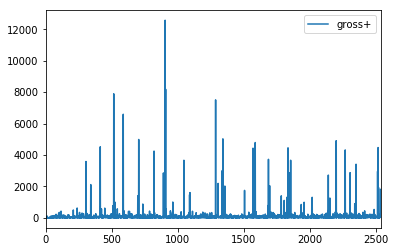

In [51]:
df[['gross+','time']].plot()
plt.show()

In [33]:
ff= './tlogs/201902'
if ff.startswith("./tlogs"):
    print ("yep")

yep


In [18]:
for f in os.walk('./tlogs'): print ("f:",f,"sub:",sub)


f: ('./tlogs', ['201902'], ['.DS_Store']) sub: []
f: ('./tlogs/201902', ['20190202', '20190203', '20190204', '20190205', '20190206', '20190207', '20190208', '20190209', '20190210', '20190211', '20190212', '20190213', '20190214', '20190215', '20190216', '20190217', '20190218', '20190219', '20190220', '20190221', '20190222', '20190223', '20190224', '20190225', '20190226', '20190227', '20190228', '20190301'], ['.DS_Store']) sub: []
f: ('./tlogs/201902/20190202', [], ['checklisting.txt', 'department.txt', 'Department01Discounts.txt', 'Department04Discounts.txt', 'Department06Discounts.txt', 'Department07Discounts.txt', 'Department08Discounts.txt', 'Department09Discounts.txt', 'Department10Discounts.txt', 'Department11Discounts.txt', 'Department12Discounts.txt', 'Department13Discounts.txt', 'Department14Discounts.txt', 'Department15Discounts.txt', 'Department16Discounts.txt', 'Department17Discounts.txt', 'Department19Discounts.txt', 'Department26Discounts.txt', 'dept.txt', 'discountitems.tx

In [ ]:
import os

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if filepath.endswith(".asm"):
            print (filepath)

In [8]:
df=pd.read_pickle('02012019.pkl')

In [10]:
df[df['BANANAS']!=0]

,date,gross+,gross-,items,net,oper,term,time,trans,type,...,PRO BAR MINT CHOC,8213 FENNEL POWDER,OR Cooked Beets,JR Melatonin SR 12,NUT WALNUT,QT Elderbry Loz 36,SW WB Vanilla 12pk,6556 DUTCH COCOA,lvngClyBntonte 8oz,CARDAMOM BITTERS
36,2001-02-19,37.65,0.00,"[[, PASCHA UNSWT CCHIP, 4.99, 15], [, PRIMAVER...",37.65,104,5,09:16,8,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,2001-02-19,108.17,0.00,"[[, FORGER PL CSH YOG, 5.59, 13], [, SO DEL UN...",108.17,42,6,09:20,12,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,2001-02-19,20.72,0.00,"[[, APPLES FUJI, 2.42, 12], [, 8308KEEMUN BLAC...",20.72,11,1,09:27,7,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,2001-02-19,144.42,0.00,"[[, WOODSTK BLUEBERRIE, 6.29, 19], [, EVOLUTIO...",144.42,42,6,09:30,17,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,2001-02-19,17.69,0.00,"[[, COELA ZIPPER TOTE, 9.99, 6], [, BANANAS, 2...",17.69,42,6,09:31,18,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,2001-02-19,224.03,0.00,"[[, APPLE JUICE, 11.39, 15], [, ORG GAL CLOVER...",224.03,104,5,09:32,21,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,2001-02-19,80.01,0.00,"[[, MAC HAWAI SEA SALT, 7.99, 15], [, UMLAUT C...",80.01,42,6,09:35,21,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,2001-02-19,86.51,0.00,"[[, FLAVORG VANILLA4oz, 15.49, 15], [, SUGAR P...",86.51,34,8,09:39,12,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,2001-02-19,285.53,0.00,"[[, VH Kids Vibe Choc, 34.4, 1], [, EZ Ultimat...",285.53,11,1,09:40,18,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,2001-02-19,55.73,0.00,"[[, QRT CAN JAR t101, 1.79, 6], [, QRT CAN JAR...",55.73,42,6,09:41,25,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
df.columns

Index(['date', 'gross+', 'gross-', 'items', 'net', 'oper', 'term', 'time',
       'trans', 'type'],
      dtype='object')

In [ ]:
plt.scatter(x=df['time'],y=df['gross+'])

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
